# StaVia (Via 2.0) for scATAC-seq Hematopoiesis

We show an example of automated cell fate prediction and pathway determination, and visualization for TI,  on a scATAC-seq dataset 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pyVIA.core as via
import warnings
warnings.filterwarnings('ignore')

In [72]:
#data available on StaVia's github page as a csv file, containing the TFs, cell annotations and Principle Components used in the original paper by Buenrostro et al.,
df = pd.read_csv('/home/user/Trajectory/Datasets/scATAC_Hemato/scATAC_hemato_Buenrostro.csv', sep=',')
print('number cells', df.shape[0])
cell_types = ['GMP', 'HSC', 'MEP', 'CLP', 'CMP', 'LMuPP', 'MPP', 'pDC', 'mono', 'UNK']
cell_dict = {'UNK': 'gray', 'pDC': 'purple', 'mono': 'gold', 'GMP': 'orange', 'MEP': 'red', 'CLP': 'aqua',
                 'HSC': 'black', 'CMP': 'moccasin', 'MPP': 'darkgreen', 'LMuPP': 'limegreen'}
cell_annot = df['cellname'].values


true_label = []
count = 0
found_annot = False
#reformatting the celltype labels
for annot in cell_annot:
    for cell_type_i in cell_types:
        if cell_type_i in annot:
            true_label.append(cell_type_i)
            found_annot = True

    if found_annot == False:
        true_label.append('unknown')
    found_annot = False

PCcol = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'] #columns in the dataframe containing the Principle Components from the TFs. details of the preprocessing method are described in Buenrostro's paper




number cells 2034


In [73]:
knn = 20
random_seed = 4
X_in = df[PCcol].values  #using the PCs provided in the Buenrostro et al., paper

start_ncomp = 0
root = [1200] #the 1200th cell in the input is an HSC cell

v0 = via.VIA(X_in, true_label, edgepruning_clustering_resolution=0.5, edgepruning_clustering_resolution_local=1, knn=knn,
         too_big_factor=0.3, root_user=root, dataset='', random_seed=random_seed, memory = 2,
          preserve_disconnected=False) 
v0.run_VIA()



2024-02-15 17:29:20.222939	Running VIA over input data of 2034 (samples) x 5 (features)
2024-02-15 17:29:20.223006	Knngraph has 20 neighbors
2024-02-15 17:29:22.628608	Finished global pruning of 20-knn graph used for clustering at level of 0.5. Kept 63.6 % of edges. 
2024-02-15 17:29:22.643187	Number of connected components used for clustergraph  is 1
2024-02-15 17:29:22.751012	Commencing community detection
2024-02-15 17:29:22.785685	Finished running Leiden algorithm. Found 31 clusters.
2024-02-15 17:29:22.787772	Merging 4 very small clusters (<10)
2024-02-15 17:29:22.789018	Finished detecting communities. Found 27 communities
2024-02-15 17:29:22.789580	Making cluster graph. Global cluster graph pruning level: 0.15
2024-02-15 17:29:22.797542	Graph has 1 connected components before pruning
2024-02-15 17:29:22.800130	Graph has 5 connected components after pruning
2024-02-15 17:29:22.805491	Graph has 1 connected components after reconnecting
2024-02-15 17:29:22.806314	0.0% links trimmed 

  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
do scaling of pt
2024-02-15 17:29:30.199701	Identifying terminal clusters corresponding to unique lineages...
2024-02-15 17:29:30.199736	Closeness:[6, 15, 17, 20, 22, 23, 24, 25, 26]
2024-02-15 17:29:30.199751	Betweenness:[0, 1, 5, 6, 11, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26]
2024-02-15 17:29:30.199766	Out Degree:[5, 6, 7, 11, 13, 15, 17, 18, 20, 24, 25, 26]
2024-02-15 17:29:30.200347	Terminal clusters corresponding to unique lineages in this component are [5, 6, 11, 15, 17, 20, 22, 23, 24, 25, 26] 
TESTING rw2_lineage probability at memory 2
testing rw2 lineage probability at memory 2
g.indptr.size, 28


  0%|          | 0/1000 [00:00<?, ?it/s]

2024-02-15 17:29:36.281404	 Cluster or terminal cell fate 5 is reached 657.0 times
2024-02-15 17:29:36.377637	 Cluster or terminal cell fate 6 is reached 598.0 times
2024-02-15 17:29:36.468722	 Cluster or terminal cell fate 11 is reached 224.0 times
2024-02-15 17:29:36.576330	 Cluster or terminal cell fate 15 is reached 146.0 times
2024-02-15 17:29:36.674248	 Cluster or terminal cell fate 17 is reached 90.0 times
2024-02-15 17:29:36.746055	 Cluster or terminal cell fate 20 is reached 596.0 times
2024-02-15 17:29:36.842464	 Cluster or terminal cell fate 22 is reached 142.0 times
2024-02-15 17:29:36.947835	 Cluster or terminal cell fate 23 is reached 134.0 times
2024-02-15 17:29:37.057720	 Cluster or terminal cell fate 24 is reached 119.0 times
2024-02-15 17:29:37.165999	 Cluster or terminal cell fate 25 is reached 121.0 times
2024-02-15 17:29:37.288452	 Cluster or terminal cell fate 26 is reached 119.0 times
2024-02-15 17:29:37.315628	There are (11) terminal clusters corresponding to un

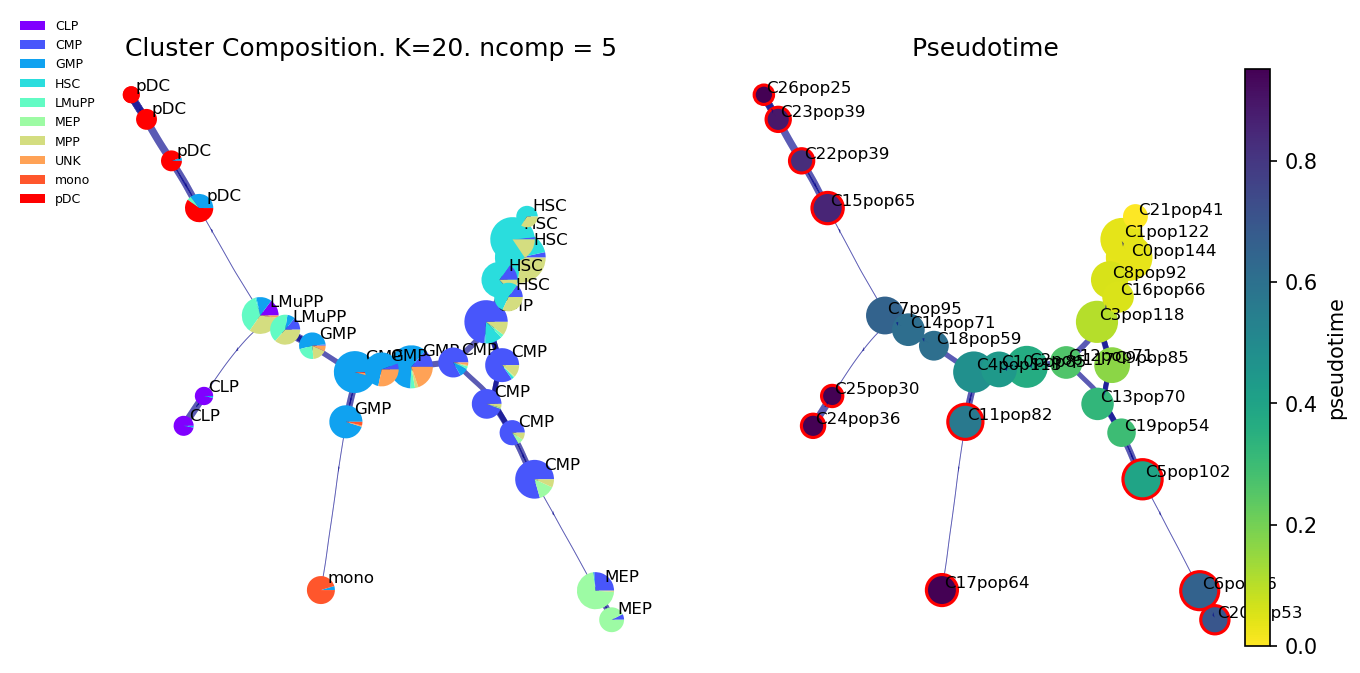

In [74]:
f,ax1, axs2 = via.plot_piechart_viagraph(v0)
f.set_size_inches(10,5)

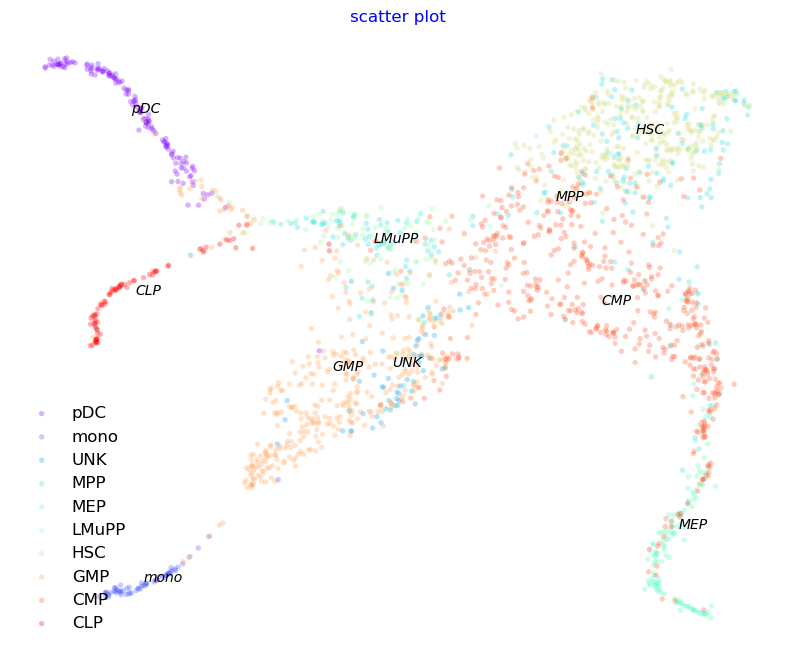

In [79]:
#Create 2D StaVia embedding using the underlying TI infused graph. The 2D embedding will be visually well aligned with the cluster-graph of the trajectory
embedding = via.via_atlas_emb(via_object=v0, min_dist=0.4) #StaVia's TI initialized embedding. Feel free to use a t-SNE, UMAP etc instead
f, ax = via.plot_scatter(embedding=embedding, labels=true_label, s=15)
f.set_size_inches(10,8)


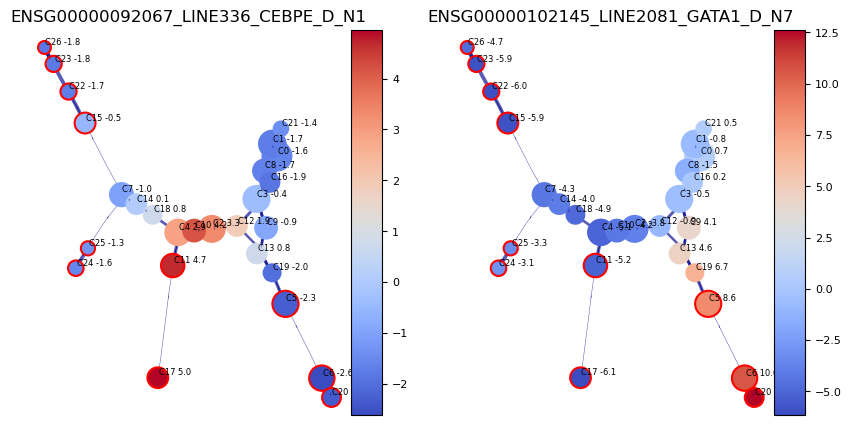

In [81]:
#plot the gene expression of selected genes along the clustergraph 
df =df.drop(['cellname'], axis=1)
gene_dict = {  'ENSG00000092067_LINE336_CEBPE_D_N1': 'CEBPE Eosophil (GMP/Mono)','ENSG00000102145_LINE2081_GATA1_D_N7':'GATA1 (MEP)'} 
genes_to_plot_list = ['ENSG00000092067_LINE336_CEBPE_D_N1','ENSG00000102145_LINE2081_GATA1_D_N7']
f, axs = via.plot_viagraph( via_object=v0,df_genes=df, gene_list=genes_to_plot_list)
f.set_size_inches(10,5)


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

2024-02-15 17:35:32.244532	Super cluster 5 is a super terminal with sub_terminal cluster 5
2024-02-15 17:35:32.244619	Super cluster 6 is a super terminal with sub_terminal cluster 6
2024-02-15 17:35:32.244658	Super cluster 11 is a super terminal with sub_terminal cluster 11
2024-02-15 17:35:32.244690	Super cluster 15 is a super terminal with sub_terminal cluster 15
2024-02-15 17:35:32.244719	Super cluster 17 is a super terminal with sub_terminal cluster 17
2024-02-15 17:35:32.244749	Super cluster 20 is a super terminal with sub_terminal cluster 20
2024-02-15 17:35:32.244776	Super cluster 22 is a super terminal with sub_terminal cluster 22
2024-02-15 17:35:32.244808	Super cluster 23 is a super terminal with sub_terminal cluster 23
2024-02-15 17:35:32.244834	Super cluster 24 is a super terminal with sub_terminal cluster 24
2024-02-15 17:35:32.244861	Super cluster 25 is a super terminal with sub_terminal cluster 25
2024-02-15 17:35:32.244886	Super cluster 26 is a super terminal with sub_t

(<Figure size 3000x1500 with 3 Axes>,
 <Axes: title={'center': 'True Labels: ncomps:5. knn:20'}>,
 <Axes: title={'center': 'Pseudotime'}>)

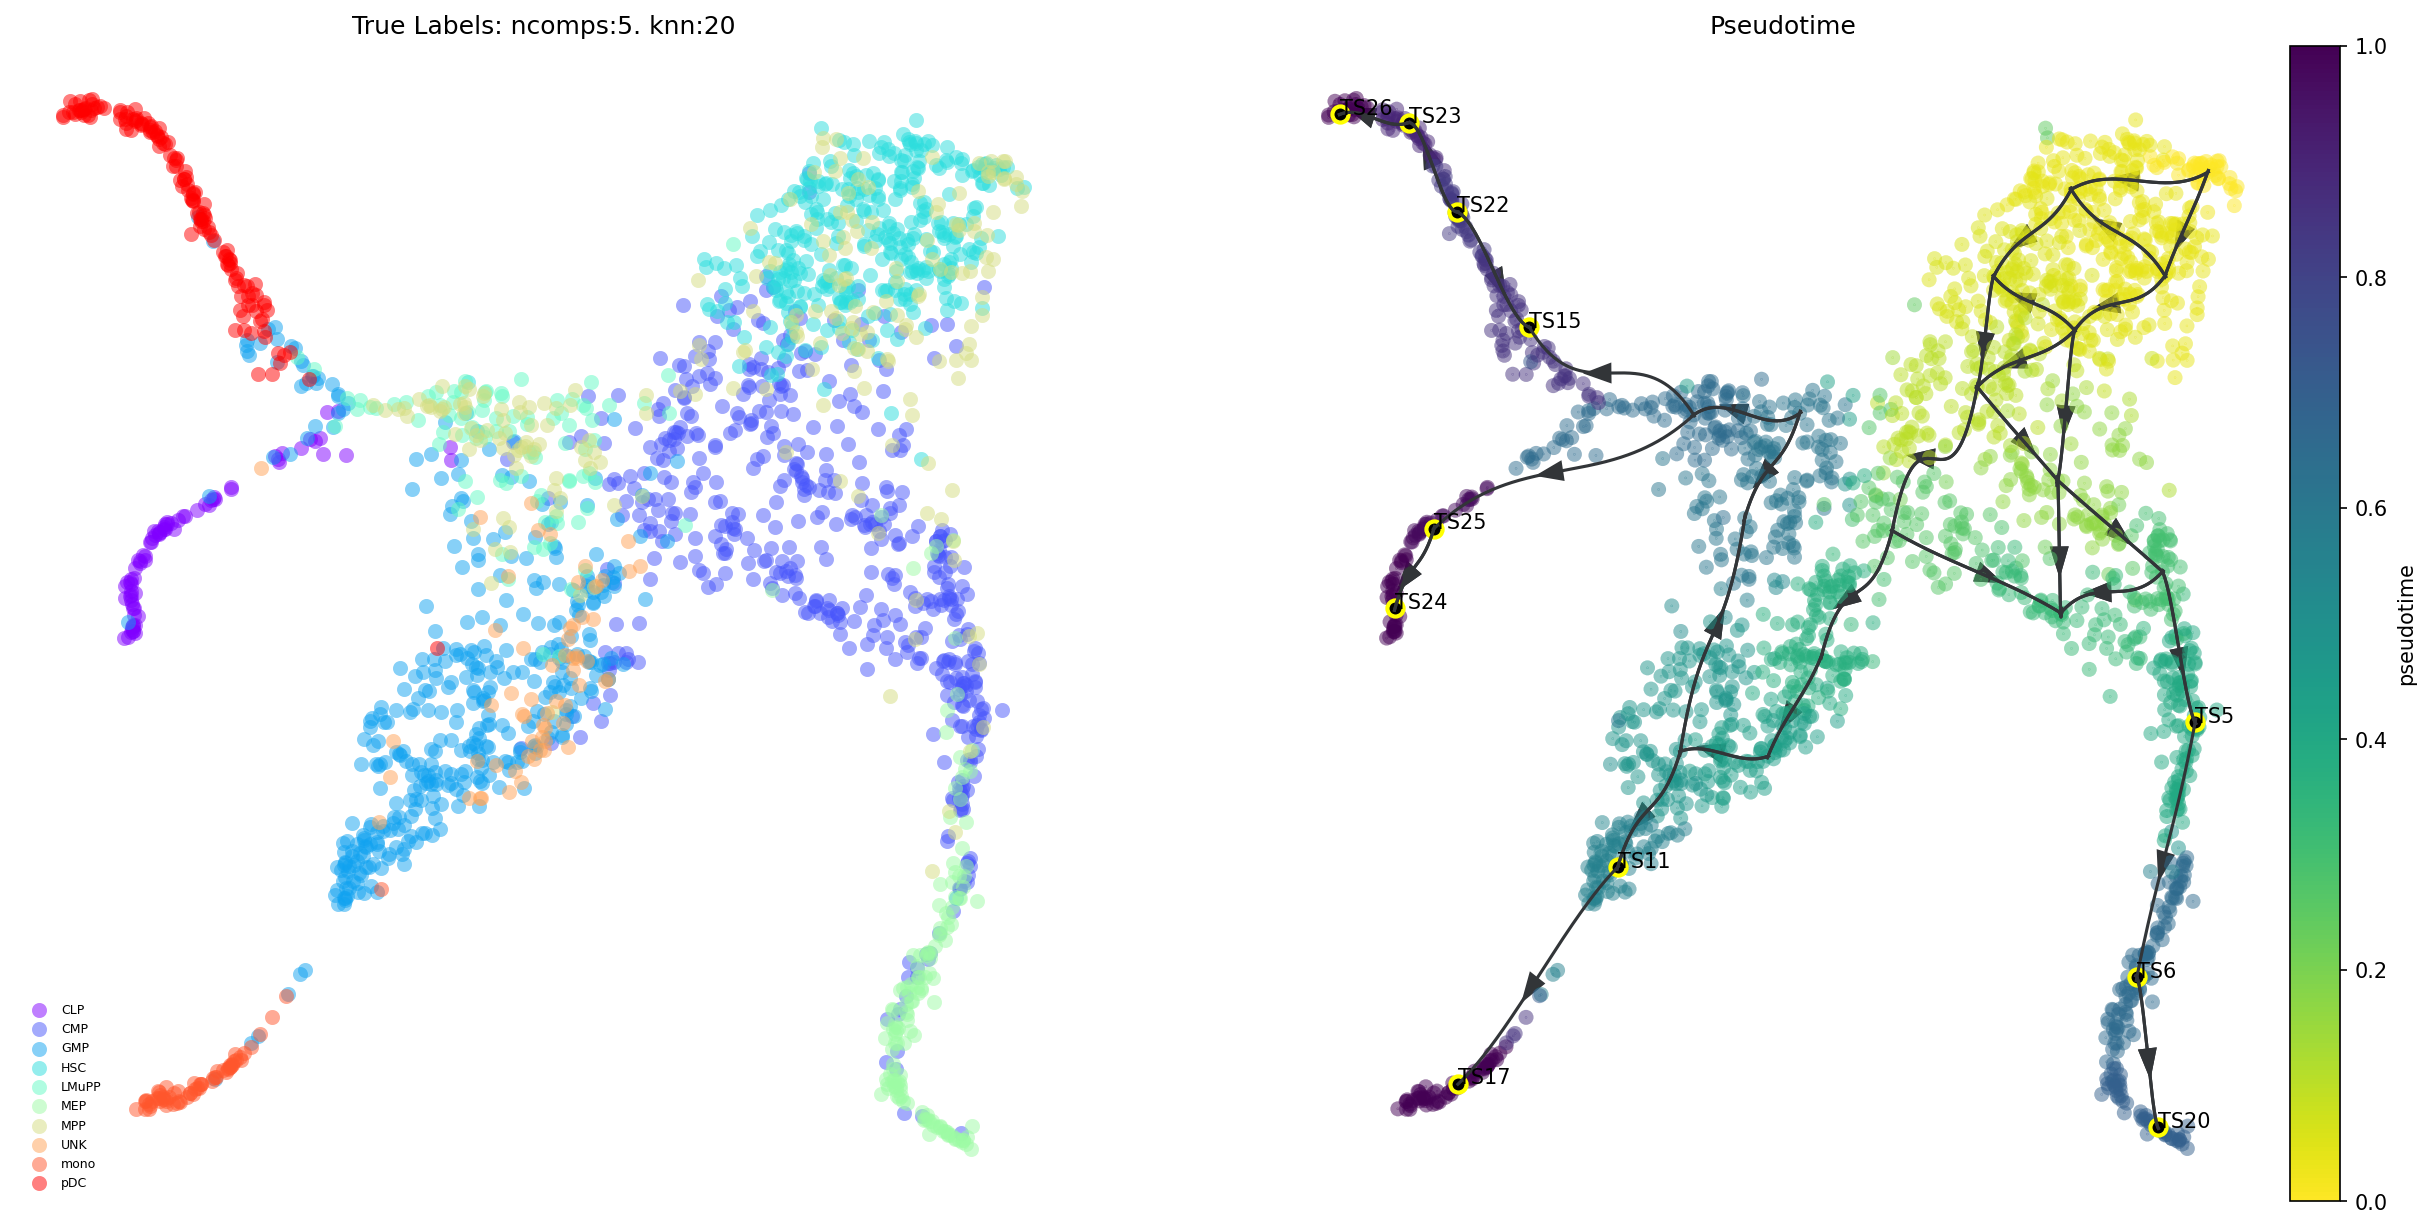

In [82]:
# draw overall pseudotime and main trajectories
via.plot_trajectory_curves(via_object = v0, embedding = embedding, 
                     title_str='Pseudotime')
# draw trajectory and evolution probability for each lineage


2024-02-15 17:35:48.454355	Marker_lineages: [20, 17, 24, 26]
2024-02-15 17:35:48.457705	The number of components in the original full graph is 1
2024-02-15 17:35:48.457755	For downstream visualization purposes we are also constructing a low knn-graph 
2024-02-15 17:35:50.070895	Check sc pb 0.9999999999999999 
f getting majority comp
2024-02-15 17:35:50.197961	Cluster path on clustergraph starting from Root Cluster 21 to Terminal Cluster 5: [21, 1, 8, 3, 9, 19, 5]
2024-02-15 17:35:50.198004	Cluster path on clustergraph starting from Root Cluster 21 to Terminal Cluster 6: [21, 1, 8, 3, 9, 19, 5, 6]
2024-02-15 17:35:50.198030	Cluster path on clustergraph starting from Root Cluster 21 to Terminal Cluster 11: [21, 1, 8, 3, 12, 2, 10, 4, 11]
2024-02-15 17:35:50.198055	Cluster path on clustergraph starting from Root Cluster 21 to Terminal Cluster 15: [21, 1, 8, 3, 12, 2, 10, 4, 18, 14, 7, 15]
2024-02-15 17:35:50.198081	Cluster path on clustergraph starting from Root Cluster 21 to Terminal Clu

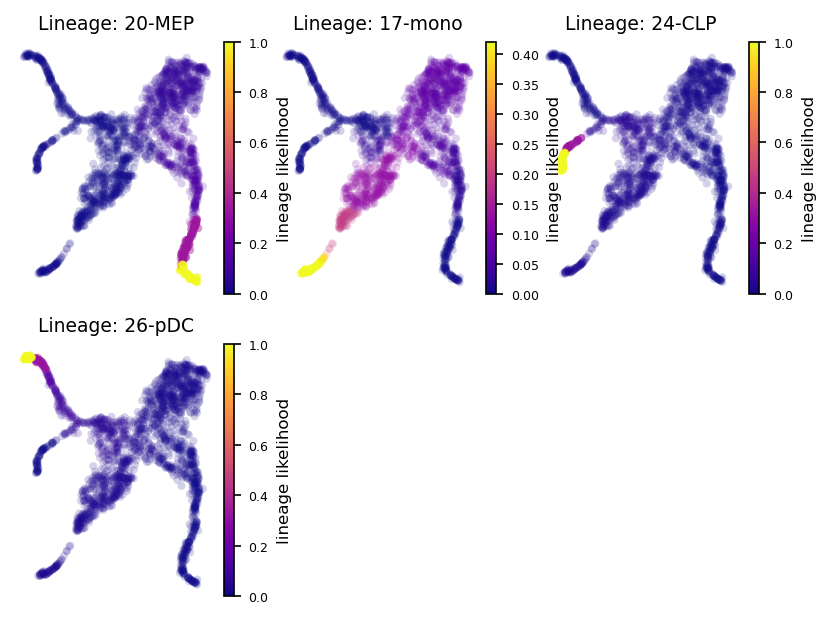

In [83]:
via.plot_sc_lineage_probability(via_object=v0, embedding = embedding,marker_lineages=[20,17,24,26])
plt.show()

2024-02-15 17:36:03.802544	Computing Edges
2024-02-15 17:36:03.802679	Start finding milestones
2024-02-15 17:36:07.042547	End milestones with 200
2024-02-15 17:36:07.047312	Recompute weights
2024-02-15 17:36:07.069225	pruning milestone graph based on recomputed weights
2024-02-15 17:36:07.070744	Graph has 1 connected components before pruning
2024-02-15 17:36:07.071944	Graph has 1 connected components after pruning
2024-02-15 17:36:07.072208	Graph has 1 connected components after reconnecting
2024-02-15 17:36:07.073549	regenerate igraph on pruned edges
2024-02-15 17:36:07.081077	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2024-02-15 17:36:07.099631	Making smooth edges
inside add sc embedding second if


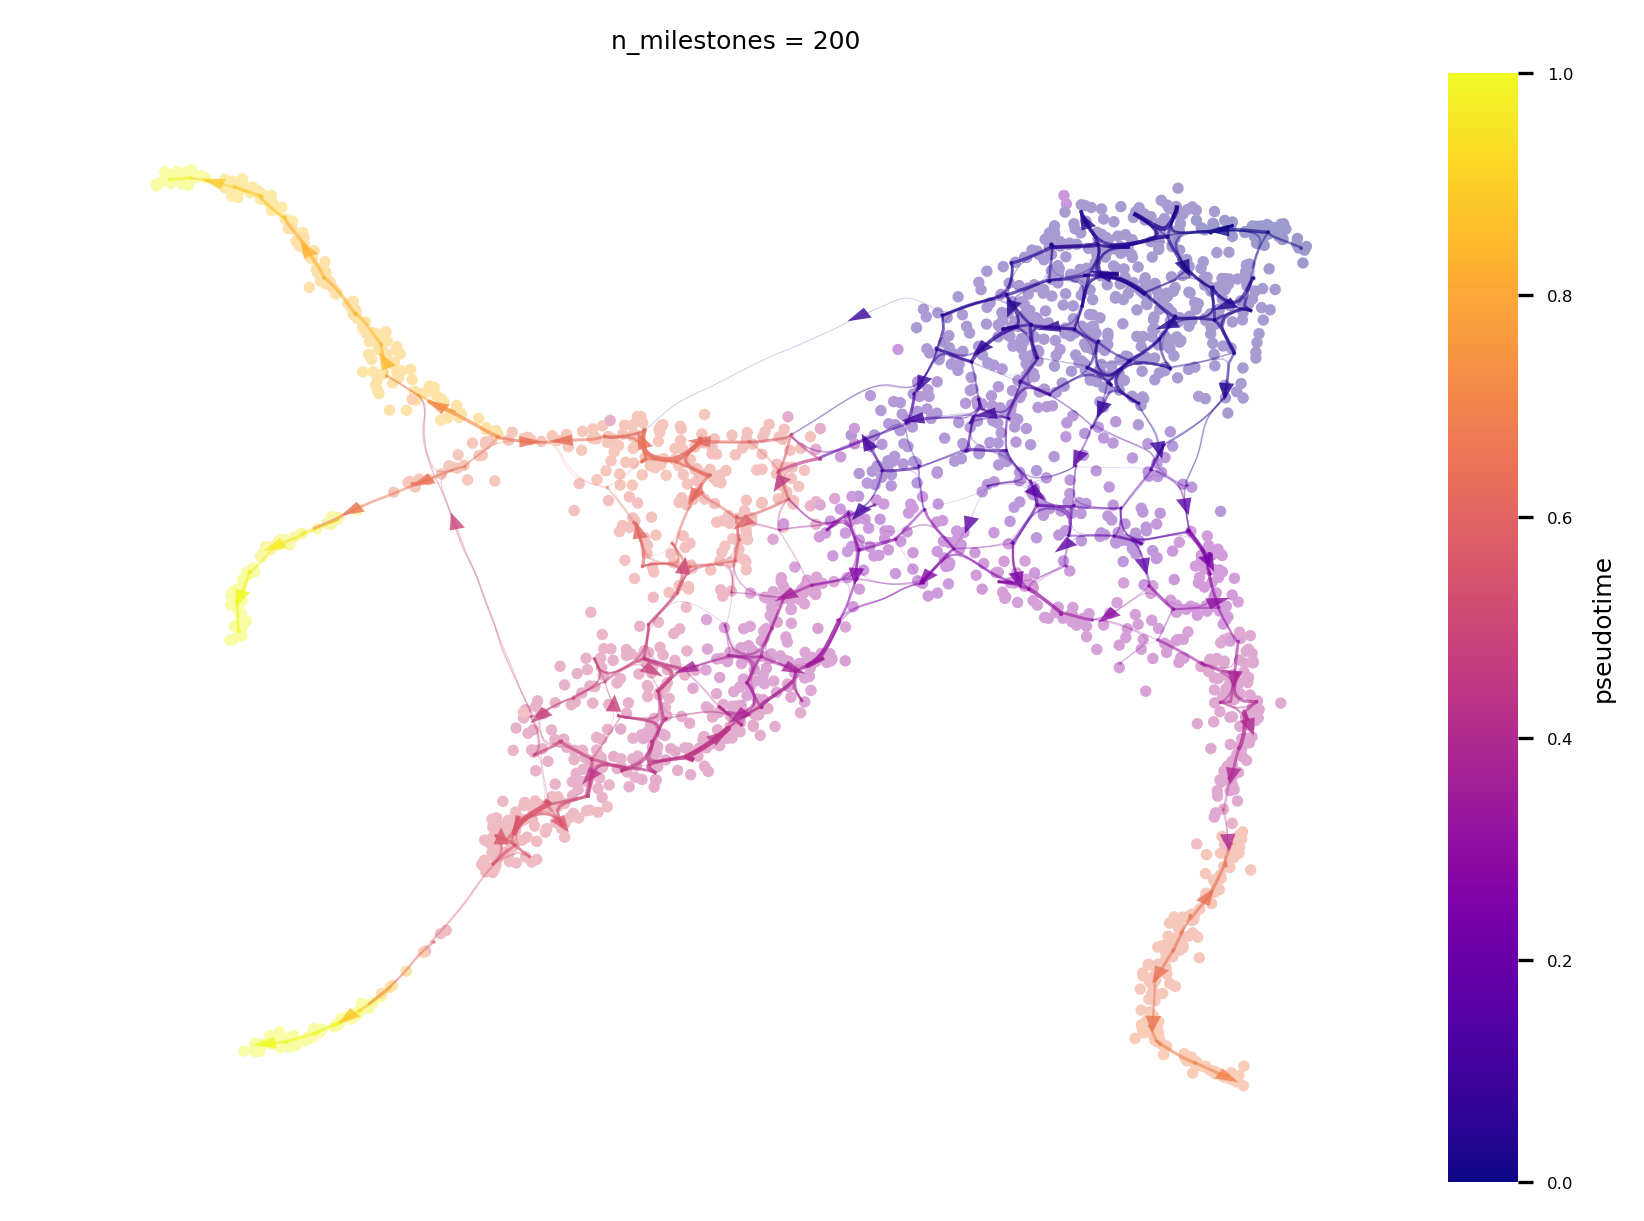

In [84]:
v0.embedding = embedding
f,ax = via.plot_atlas_view(via_object=v0,  n_milestones=200, add_sc_embedding=True, sc_labels_expression=v0.single_cell_pt_markov, headwidth_bundle=0.25, linewidth_bundle=2, size_milestones=1, sc_scatter_size=3)

2024-02-15 17:36:25.694978	Computing Edges
2024-02-15 17:36:25.695071	Start finding milestones
2024-02-15 17:36:29.525512	End milestones with 400
2024-02-15 17:36:29.530589	Recompute weights
2024-02-15 17:36:29.568129	pruning milestone graph based on recomputed weights
2024-02-15 17:36:29.569637	Graph has 1 connected components before pruning
2024-02-15 17:36:29.570804	Graph has 1 connected components after pruning
2024-02-15 17:36:29.571118	Graph has 1 connected components after reconnecting
2024-02-15 17:36:29.575342	regenerate igraph on pruned edges
2024-02-15 17:36:29.589088	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2024-02-15 17:36:29.623256	Making smooth edges
location of 11 is at [2] and 2
location of 5 is at [0] and 0


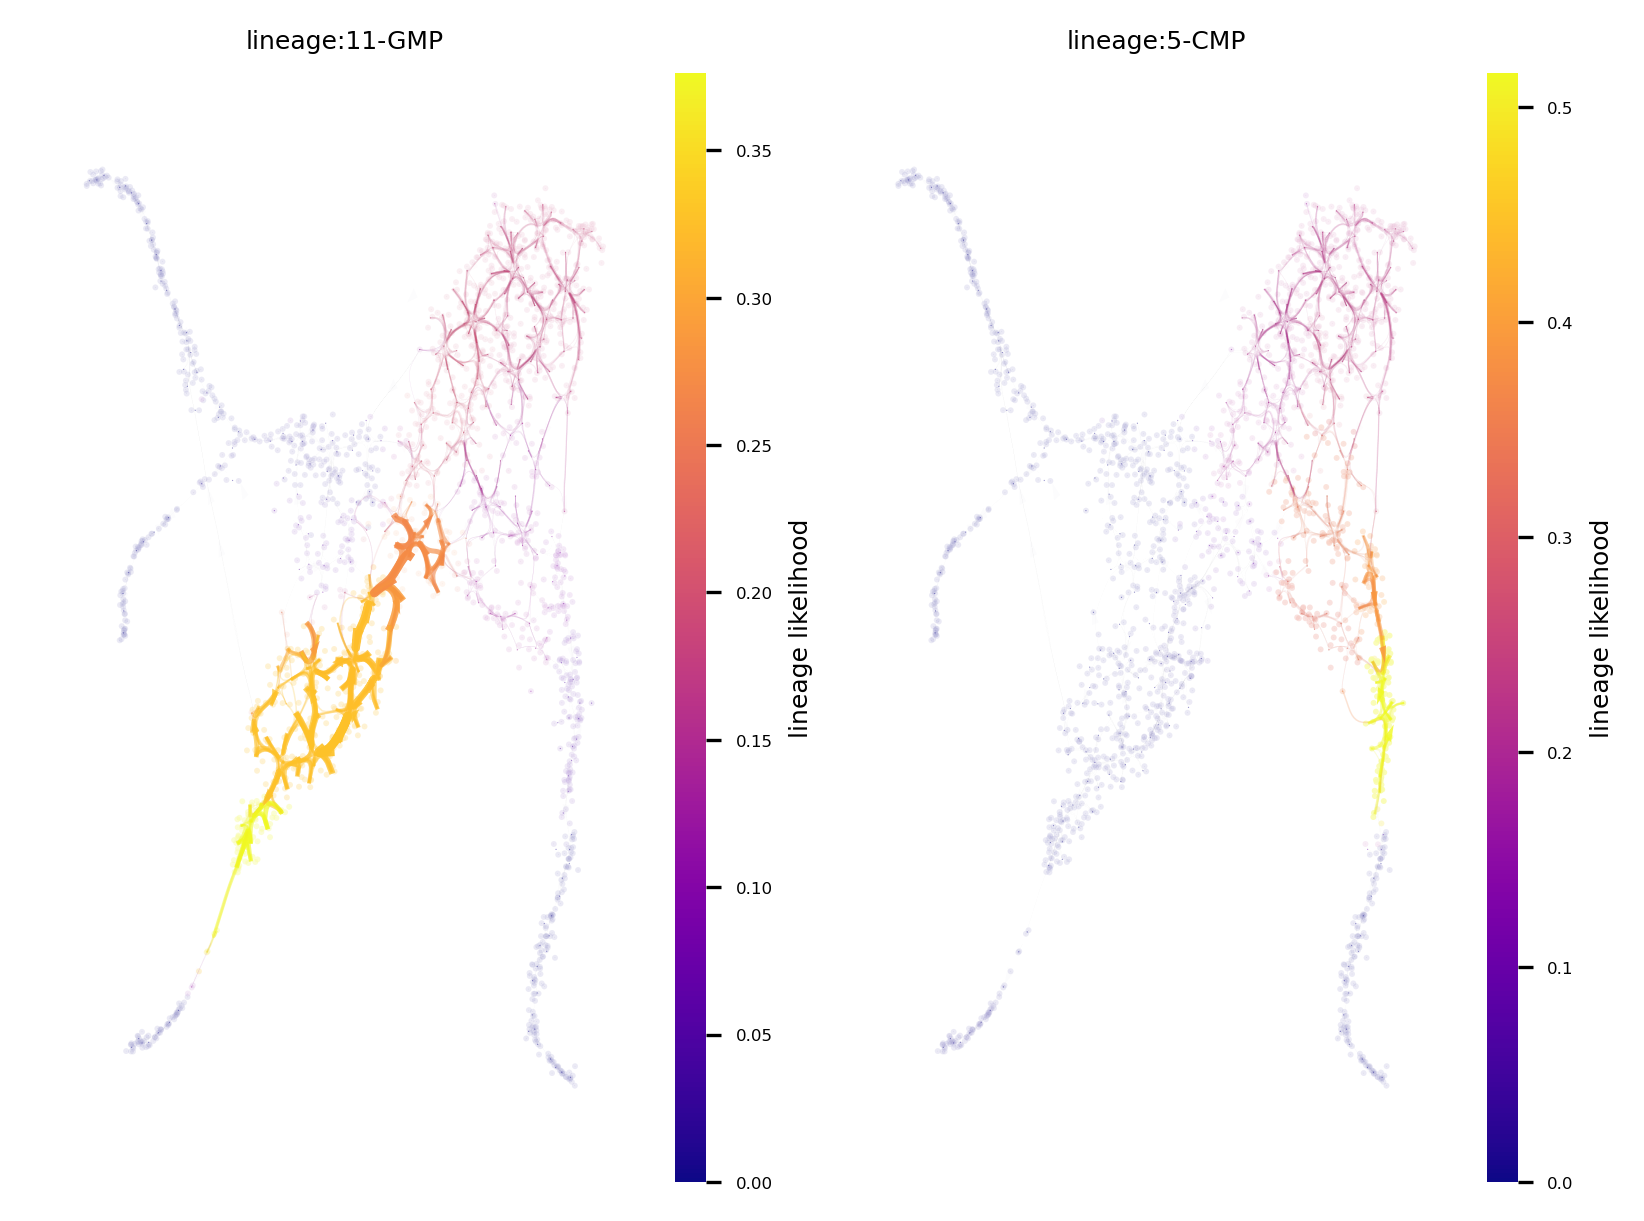

In [85]:
#plotting a subset of the detected final cell fates 
v0.embedding = embedding
f, ax = via.plot_atlas_view(via_object=v0, n_milestones=400, add_sc_embedding=True, sc_scatter_size=2, size_milestones=0.1,
                            lineage_pathway=[11,5], headwidth_bundle=0.25, linewidth_bundle=2)